<a href="https://colab.research.google.com/github/Suchith-H-C/Deep-Learning-and-Generative-AI-Lab/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Shape of X_train: (50000, 32, 32, 3)
Shape of y_train: (50000,)
Shape of X_test: (10000, 32, 32, 3)
Shape of y_test: (10000,)


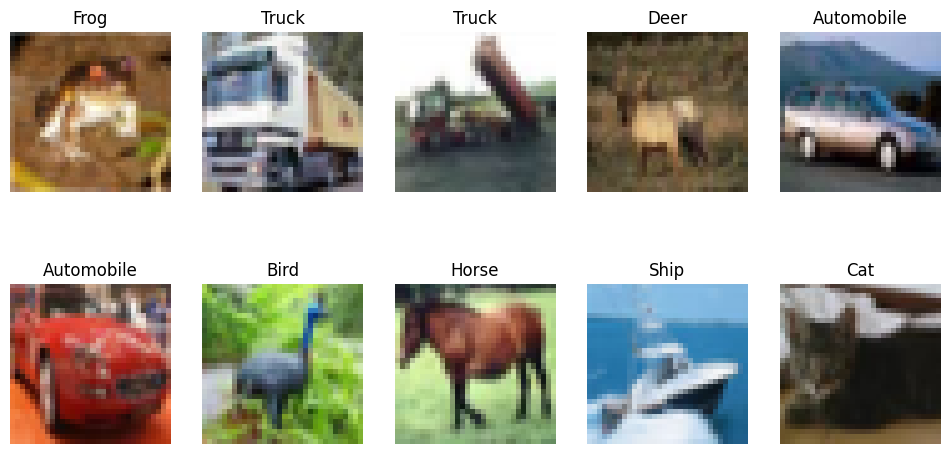

New shape of X_train: (50000, 3072)
New shape of X_test: (10000, 3072)
Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 25ms/step - accuracy: 0.2506 - loss: 2.0682 - val_accuracy: 0.3654 - val_loss: 1.7668
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.3746 - loss: 1.7416 - val_accuracy: 0.3856 - val_loss: 1.6969
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.4108 - loss: 1.6372 - val_accuracy: 0.4175 - val_loss: 1.6547
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.4321 - loss: 1.5863 - val_accuracy: 0.4090 - val_loss: 1.6549
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 31s 25ms/step - accuracy: 0.4522 - loss: 1.5235 - val_accuracy: 0.4425 - val_loss: 1.5482
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.4686 - loss: 1.4788 - val_accuracy: 0.4471 - val_loss: 1.5410
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.4838 - loss: 1.4460 - val_accuracy: 0.4566 - val_loss: 1.5203
Epoch

KeyboardInterrupt: 

In [1]:
# Load required packages
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
import pandas as pd

# Load CIFAR-10 data
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

# Flatten label arrays
y_train = y_train.flatten()
y_test = y_test.flatten()

# Print shapes
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

# Class names for CIFAR-10
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Display first 10 CIFAR-10 images
fig, axs = plt.subplots(2, 5, figsize=(12, 6), facecolor='white')
n = 0
for i in range(2):
    for j in range(5):
        axs[i, j].imshow(X_train[n])
        axs[i, j].set(title=class_names[y_train[n]])
        axs[i, j].axis('off')
        n += 1
plt.show()

# Reshape and normalize input data (flatten 32x32x3 to 3072 and normalize)
X_train = X_train.reshape(50000, 3072).astype("float32") / 255
X_test = X_test.reshape(10000, 3072).astype("float32") / 255

# Print new shapes
print("New shape of X_train:", X_train.shape)
print("New shape of X_test:", X_test.shape)

# Define the DFF model
model = Sequential(name="DFF-CIFAR10")
model.add(Input(shape=(3072,), name='Input-Layer'))
model.add(Dense(512, activation='relu', name='Hidden-Layer-1', kernel_initializer='HeNormal'))
model.add(Dense(256, activation='relu', name='Hidden-Layer-2', kernel_initializer='HeNormal'))
model.add(Dense(128, activation='relu', name='Hidden-Layer-3', kernel_initializer='HeNormal'))
model.add(Dense(10, activation='softmax', name='Output-Layer'))

# Compile the model
model.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=20, verbose=1, validation_split=0.2, shuffle=True)

# Predict labels
pred_labels_tr = np.array(tf.math.argmax(model.predict(X_train), axis=1))
pred_labels_te = np.array(tf.math.argmax(model.predict(X_test), axis=1))

# Model Summary
print("\nModel Summary:")
model.summary()

# Evaluation
print("\n---------- Evaluation on Training Data -----------")
report_train = classification_report(y_train, pred_labels_tr, target_names=class_names, output_dict=True)
print(classification_report(y_train, pred_labels_tr, target_names=class_names))

print("\n---------- Evaluation on Test Data -----------")
report_test = classification_report(y_test, pred_labels_te, target_names=class_names, output_dict=True)
print(classification_report(y_test, pred_labels_te, target_names=class_names))

# Plot Macro Average Comparison
df_train = pd.DataFrame(report_train).transpose()
df_test = pd.DataFrame(report_test).transpose()

metrics = ['precision', 'recall', 'f1-score']
train_scores = df_train.loc['macro avg', metrics]
test_scores = df_test.loc['macro avg', metrics]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width/2, train_scores, width, label='Training', color='skyblue')
rects2 = ax.bar(x + width/2, test_scores, width, label='Testing', color='salmon')

ax.set_ylabel('Scores')
ax.set_title('Macro Average Performance Comparison (CIFAR-10)')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.ylim(0, 1.1)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

